In [1]:
import pandas as pd
import requests
import csv
import os
from datetime import datetime


url = "https://bdfed.stitch.mlbinfra.com/bdfed/transform-mlb-standings?splitPcts=false&numberPcts=false&standingsView=division&sortTemplate=3&season=2025&leagueIds=103&leagueIds=104&standingsTypes=regularSeason&contextTeamId=&teamId=&hydrateAlias=noSchedule&sortDivisions=201,202,200,204,205,203&sortLeagues=103,104,115,114&sortSports=1="
response = requests.get(url)
data = response.json()
print(data)

{'lastUpdated': '2025-07-15T14:39:58.705Z', 'structure': {'sports': [{'sortIndex1': 0, 'sortIndex2': 10000.0, 'sortIndex3': 3, 'leagues': [{'sortIndex1': 0, 'sortIndex2': 10000.0, 'sortIndex3': 3, 'divisions': [{'sortIndex1': 0, 'sortIndex2': 10000.0, 'sortIndex3': 3, 'standingsUtils': {'hasFavorites': False, 'hasMostFavorite': False, 'hasFollowed': False, 'hasContextTeam': False}, 'id': 201, 'name': 'American League East', 'season': '2025', 'nameShort': 'AL East', 'link': '/api/v1/divisions/201', 'abbreviation': 'ALE', 'hasWildcard': False, 'sortOrder': 22, 'numPlayoffTeams': 1, 'active': True}, {'sortIndex1': 1, 'sortIndex2': 10000.0, 'sortIndex3': 3, 'standingsUtils': {'hasFavorites': False, 'hasMostFavorite': False, 'hasFollowed': False, 'hasContextTeam': False}, 'id': 202, 'name': 'American League Central', 'season': '2025', 'nameShort': 'AL Central', 'link': '/api/v1/divisions/202', 'abbreviation': 'ALC', 'hasWildcard': False, 'sortOrder': 23, 'numPlayoffTeams': 1, 'active': True

In [2]:
import pprint as pprint

pprint.pprint(data)

{'clinchIcons': [],
 'common-version': 1,
 'lastUpdated': '2025-07-15T14:39:58.705Z',
 'records': [{'clinchIcons': [],
              'division': 201,
              'lastUpdated': '2025-07-15T14:39:58.705Z',
              'standingsType': 'regularSeason',
              'teamRecords': [{'abbreviation': 'TOR',
                               'clinchIndicator': None,
                               'clinched': False,
                               'conferenceGamesBack': '-',
                               'conferenceRank': None,
                               'division': 201,
                               'divisionChamp': False,
                               'divisionGamesBack': '-',
                               'divisionLeader': True,
                               'divisionRank': 1,
                               'eliminationNumber': '-',
                               'id': '141',
                               'isContextTeam': False,
                               'isFavorite': False

In [3]:
teams = []

for records in data['records']:
    for team in records['teamRecords']:
        teams.append({
            'team': team['name'],
            'wins': team['wins'],
            'losses': team['losses']})
teams

[{'team': 'Toronto Blue Jays', 'wins': 55, 'losses': 41},
 {'team': 'New York Yankees', 'wins': 53, 'losses': 43},
 {'team': 'Boston Red Sox', 'wins': 53, 'losses': 45},
 {'team': 'Tampa Bay Rays', 'wins': 50, 'losses': 47},
 {'team': 'Baltimore Orioles', 'wins': 43, 'losses': 52},
 {'team': 'Detroit Tigers', 'wins': 59, 'losses': 38},
 {'team': 'Minnesota Twins', 'wins': 47, 'losses': 49},
 {'team': 'Kansas City Royals', 'wins': 47, 'losses': 50},
 {'team': 'Cleveland Guardians', 'wins': 46, 'losses': 49},
 {'team': 'Chicago White Sox', 'wins': 32, 'losses': 65},
 {'team': 'Houston Astros', 'wins': 56, 'losses': 40},
 {'team': 'Seattle Mariners', 'wins': 51, 'losses': 45},
 {'team': 'Texas Rangers', 'wins': 48, 'losses': 49},
 {'team': 'Los Angeles Angels', 'wins': 47, 'losses': 49},
 {'team': 'Athletics', 'wins': 41, 'losses': 57},
 {'team': 'Philadelphia Phillies', 'wins': 55, 'losses': 41},
 {'team': 'New York Mets', 'wins': 55, 'losses': 42},
 {'team': 'Miami Marlins', 'wins': 44,

In [4]:
df = pd.DataFrame(teams)
df

,team,wins,losses
0,Toronto Blue Jays,55,41
1,New York Yankees,53,43
2,Boston Red Sox,53,45
3,Tampa Bay Rays,50,47
4,Baltimore Orioles,43,52
5,Detroit Tigers,59,38
6,Minnesota Twins,47,49
7,Kansas City Royals,47,50
8,Cleveland Guardians,46,49
9,Chicago White Sox,32,65


In [5]:
for idx, team in enumerate(teams):
    print(idx, team)


0 {'team': 'Toronto Blue Jays', 'wins': 55, 'losses': 41}
1 {'team': 'New York Yankees', 'wins': 53, 'losses': 43}
2 {'team': 'Boston Red Sox', 'wins': 53, 'losses': 45}
3 {'team': 'Tampa Bay Rays', 'wins': 50, 'losses': 47}
4 {'team': 'Baltimore Orioles', 'wins': 43, 'losses': 52}
5 {'team': 'Detroit Tigers', 'wins': 59, 'losses': 38}
6 {'team': 'Minnesota Twins', 'wins': 47, 'losses': 49}
7 {'team': 'Kansas City Royals', 'wins': 47, 'losses': 50}
8 {'team': 'Cleveland Guardians', 'wins': 46, 'losses': 49}
9 {'team': 'Chicago White Sox', 'wins': 32, 'losses': 65}
10 {'team': 'Houston Astros', 'wins': 56, 'losses': 40}
11 {'team': 'Seattle Mariners', 'wins': 51, 'losses': 45}
12 {'team': 'Texas Rangers', 'wins': 48, 'losses': 49}
13 {'team': 'Los Angeles Angels', 'wins': 47, 'losses': 49}
14 {'team': 'Athletics', 'wins': 41, 'losses': 57}
15 {'team': 'Philadelphia Phillies', 'wins': 55, 'losses': 41}
16 {'team': 'New York Mets', 'wins': 55, 'losses': 42}
17 {'team': 'Miami Marlins', 'w

In [6]:
Nick = 'Nick', teams[0]['wins'] + teams[10]['wins'] + teams[18]['wins'] + teams[7]['wins'] + teams[19]['wins']
Doug = 'Doug', teams[4]['wins'] + teams[8]['wins'] + teams[5]['wins'] + teams[23]['wins'] + teams[12]['wins']
Ryan_Hi = 'Ryan Hi', teams[27]['wins'] + teams[25]['wins'] + teams[13]['wins'] + teams[24]['wins'] + teams[14]['wins']
Peter = 'Peter', teams[1]['wins'] + teams[20]['wins'] + teams[26]['wins'] + teams[22]['wins'] + teams[9]['wins']
Ryan_Hu = 'Ryan Hu', teams[15]['wins'] + teams[16]['wins'] + teams[3]['wins'] + teams[21]['wins'] + teams[29]['wins']
Colin = 'Colin', teams[28]['wins'] + teams[11]['wins'] + teams[2]['wins'] + teams[6]['wins'] + teams[17]['wins']

standings = [Nick, Doug, Ryan_Hi, Peter, Ryan_Hu, Colin]
standings
standings = pd.DataFrame(standings)
standings

,0,1
0,Nick,238
1,Doug,246
2,Ryan Hi,237
3,Peter,245
4,Ryan Hu,238
5,Colin,242


<Axes: >

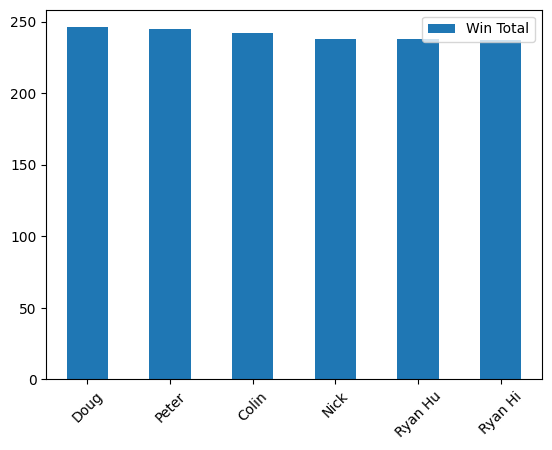

In [7]:
standings.rename(columns={1: 'Win Total'}, inplace=True)
standings.rename(index={0: 'Nick', 1: 'Doug', 2: 'Ryan Hi', 3: 'Peter', 4: 'Ryan Hu', 5: 'Colin'}, inplace=True)
standings.sort_values(by = 'Win Total', ascending = False).plot(kind='bar', rot=45)

<Axes: >

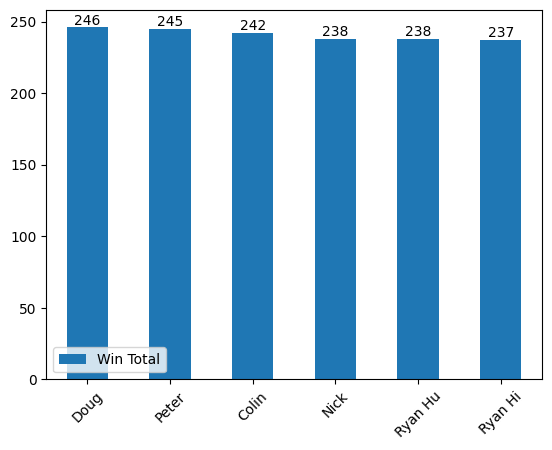

In [8]:
bar = standings.sort_values(by = 'Win Total', ascending = False).plot(kind='bar', rot=45)
bar.bar_label(bar.containers[0])
bar

In [9]:
# I want to write a function that adds win totals by date to a csv for each participant,
# then display a line graph showing win total changes over time

In [10]:
def log_win_totals(participants_win_totals, csv_path='wins_history.csv'):
    today = datetime.today().strftime('%Y-%m-%d')
    row = {'date': today}
    row.update(participants_win_totals)
    
    if not os.path.isfile(csv_path) or os.path.getsize(csv_path) == 0:
        df = pd.DataFrame([row])
    else:
        try:
            df = pd.read_csv(csv_path)
            df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
        except pd.errors.EmptyDataError:
            df = pd.DataFrame([row])
    
    df.to_csv(csv_path, index=False)

participants_win_totals = {
    Nick,
    Doug,
    Ryan_Hi,
    Peter,
    Ryan_Hu,
    Colin
}

log_win_totals(participants_win_totals)


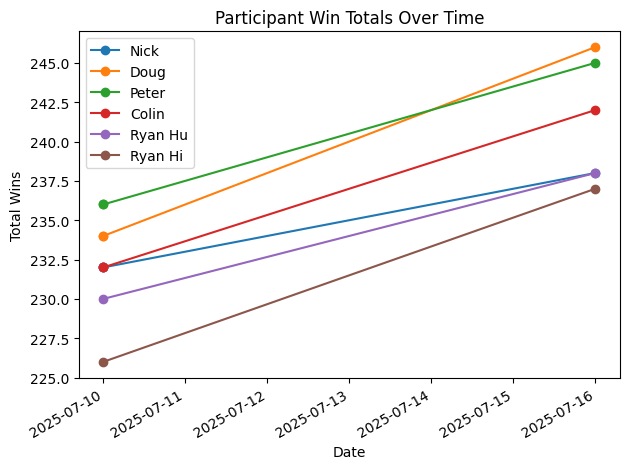

In [11]:
import matplotlib.pyplot as plt

def plot_win_history(csv_path='wins_history.csv'):
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    ax = df.plot(kind='line', marker='o')
    plt.title('Participant Win Totals Over Time')
    plt.ylabel('Total Wins')
    plt.xlabel('Date')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_win_history('wins_history.csv')